In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img src="http://140.116.53.170/classes/numericalOptimization/InteriorPointMethods/figure000.png" with="600" heigh="400">

<img src="http://140.116.53.170/classes/numericalOptimization/InteriorPointMethods/figure001.png" with="600" heigh="400">

<img src="http://140.116.53.170/classes/numericalOptimization/InteriorPointMethods/figure008.png" with="600" heigh="400">

The standard form of the given LP
$$
\begin{array}{rl}
\min & -x_1-3x_2\\
s.t. & x_1-2x_2 \geq -4\\
     & -x_1-x_2\geq -4\\
     &x_1,x_2\geq 0
\end{array}
$$
is 
$$
\begin{array}{rl}
\min & -x_1-3x_2\\
s.t. & x_1-2x_2-x_3 =-4\\
     & -x_1-x_2-x_4 =-4\\
     &x_1,x_2,x_3,x_4\geq 0
\end{array}.
$$

In [18]:
d=np.array([[1],[-1],[2],[-2]])
x=np.array([[1],[1/2],[1/3],[1/4]])
epsilon=1e-8
gamma=0.9

def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB

alphaUB=determineStepSizeUB(d,x,gamma,0.1)
print(alphaUB)
print(x+alphaUB*d)

0.1
[[1.1       ]
 [0.4       ]
 [0.53333333]
 [0.05      ]]


In [3]:
m,n=2,4
A=np.zeros((m,n))
A[0,0]=1
A[0,1]=-2
A[0,2]=-1
A[0,3]=0
A[1,0]=-1
A[1,1]=-1
A[1,2]=0
A[1,3]=-1
b=np.zeros((m,1))
b[0,0]=-4
b[1,0]=-4
c=np.zeros((n,1))
c[0,0]=-1
c[1,0]=-3
c[2,0]=0
c[3,0]=0

barx=np.zeros((n,1))
barx[0,0]=1
barx[1,0]=1
barx[2,0]=4
barx[3,0]=4

#print(r1)
bary=np.zeros((m,1))
bary[0,0]=1
bary[1,0]=1
bars=np.zeros((n,1))
bars[0,0]=1
bars[1,0]=1
bars[2,0]=1
bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=np.zeros((n,n))
barX[0,0]=barx[0,0]
barX[1,1]=barx[1,0]
barX[2,2]=barx[2,0]
barX[3,3]=barx[3,0]
for i in range(n):
    barX[i,i]=barx[i,0]
    #print(barX)
barS=np.zeros((n,n))
for i in range(n):
    barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-6:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    #print(barA)
    np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    #print(barA)
    np.hstack((barS,np.zeros((n,m)),barX))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    #print(barA)
    np.linalg.inv(barA)
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    r2=c-A.transpose().dot(bary)-bars
    barX=np.zeros((n,n))
    barX[0,0]=barx[0,0]
    barX[1,1]=barx[1,0]
    barX[2,2]=barx[2,0]
    barX[3,3]=barx[3,0]
    for i in range(n):
        barX[i,i]=barx[i,0]
        #print(barX)
    barS=np.zeros((n,n))
    for i in range(n):
        barS[i,i]=bars[i,0]
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)

0
195.0487118644981
1
186.54435231826696
2
49.83470614692771
3
6.517018541382946
4
2.123219791847234
5
0.6624719949946216
6
0.09983306064443273
7
0.011394214641513507
8
0.0012580177246344065
9
0.00013456054553563377
10
1.3956622004840039e-05
11
1.4218404900786894e-06
[[1.33333334e+00]
 [2.66666661e+00]
 [1.20725053e-07]
 [4.82903030e-08]]


There are $4$ data points $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, $(x_{4},y_{4})$:
$$
\begin{array}{|r|r|r|r|r|r|r|r|r|r|r|r|r||r|r|r|}
\hline
   i  & 1 & 2 & 3 & 4 \\\hline
  x_i & 4.0 & 4.2 & 4.5 & 4.7 \\ \hline
  y_i & 102.56 & 113.18 & 130.11 & 142.05 \\
  \hline
\end{array}
$$
Assume that the curve $f(x)$ is defined by $(\alpha_1,\alpha_2,\alpha_{3})$ i.e.
$f(x)=\alpha_{3} x^{2} + \alpha_{2} x^{1} + \alpha_{1}.$ Here, we consider the fitting problem:
$$
(P_1)
\begin{array}{rl}
\min & \sum_{i=1}^{4} |y_{i}-f(x_i)|\\
s.t. & \alpha_1,\alpha_2,\alpha_{3}: unrestricted.
\end{array}
$$
For the problem $(P_1)$, we reformulate it as follows
$$
\begin{array}{rl}
\min & \sum_{i=1}^{4} t_i+s_i\\
s.t. & y_i-f(x_i)=t_i-s_i, i=1,2,3,4\\
     & \alpha_1,\alpha_2,\alpha_3: unrestricted.\\
     & t_i\geq 0, i=1,2,3,4\\
     & s_i\geq 0, i=1,2,3,4
\end{array}
$$
Build a py-file to solve the problem $(P_1)$.

In [19]:
dataSet=[[4.0,102.56],[4.2,113.18],[4.5,130.11],[4.7,142.05]]
dataSet=np.array(dataSet)
print(dataSet)
numberDatapts=len(dataSet)
dimDatapt=len(dataSet[0,:])
print(numberDatapts,dimDatapt)

[[  4.   102.56]
 [  4.2  113.18]
 [  4.5  130.11]
 [  4.7  142.05]]
4 2


In [20]:
degree=3
A=np.zeros((numberDatapts,2*degree+2*numberDatapts))
print(A)
for i in range(numberDatapts):
    print(i)
    A[i,0*2]=1
    A[i,0*2+1]=-1
    for j in range(1,degree):
        A[i,j*2]=(dataSet[i,0])**j
        A[i,j*2+1]=-(dataSet[i,0])**j
    A[i,5+i*2+1]=1
    A[i,6+i*2+1]=-1
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
1
2
3
[[  1.    -1.     4.    -4.    16.   -16.     1.    -1.     0.     0.
    0.     0.     0.     0.  ]
 [  1.    -1.     4.2   -4.2   17.64 -17.64   0.     0.     1.    -1.
    0.     0.     0.     0.  ]
 [  1.    -1.     4.5   -4.5   20.25 -20.25   0.     0.     0.     0.
    1.    -1.     0.     0.  ]
 [  1.    -1.     4.7   -4.7   22.09 -22.09   0.     0.     0.     0.
    0.     0.     1.    -1.  ]]


In [21]:
b=np.zeros((numberDatapts,1))
for i in range(numberDatapts):
    b[i,0]=dataSet[i,1]
print(b)
c=np.zeros((2*degree+2*numberDatapts,1))
for i in range(numberDatapts):
    c[2*degree+i*2,0]=1
    c[2*degree+i*2+1,0]=1
print(c)

[[102.56]
 [113.18]
 [130.11]
 [142.05]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [22]:
def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in range(n):
        barX[i,i]=barx[i,0]
    return barX

In [23]:
m,n=4,14


#barx=np.zeros((n,1))
barx=np.ones((n,1))
#barx[0,0]=1
#barx[1,0]=1
#barx[2,0]=4
#barx[3,0]=4

#print(r1)
#bary=np.zeros((m,1))
bary=np.ones((m,1))
#bary[0,0]=1
#bary[1,0]=1
bars=np.ones((n,1))
#bars=np.zeros((n,1))
#bars[0,0]=1
#bars[1,0]=1
#bars[2,0]=1
#bars[3,0]=1


#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
#barX=np.zeros((n,n))
#barX[0,0]=barx[0,0]
#barX[1,1]=barx[1,0]
#barX[2,2]=barx[2,0]
#barX[3,3]=barx[3,0]
#for i in range(n):
#    barX[i,i]=barx[i,0]
#    #print(barX)
#barS=np.zeros((n,n))
#for i in range(n):
#    barS[i,i]=bars[i,0]
#r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-6:
    print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
    print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
print(barx)

0
458.0900800061054
1
333.6676878388018
2
45.19898469958897
3
6.390754007362096
4
0.7690558240435457
5
0.08727392893417184
6
0.011463318349366992
7
0.003243228449844033
8
0.0008599324803305386
9
0.00010988160421611978
10
1.2879887344135695e-05
11
1.6341025680766596e-06
[[6.14098838e+02]
 [6.13114076e+02]
 [6.11986170e+02]
 [6.12992766e+02]
 [6.17390805e+02]
 [6.10790704e+02]
 [1.22214061e-07]
 [4.10152709e-08]
 [2.92372081e-08]
 [2.84700241e-03]
 [2.86727211e-03]
 [2.92371940e-08]
 [4.10159502e-08]
 [1.22384479e-07]]


In [24]:
a=np.zeros((degree,1))
a[0,0]=barx[0,0]-barx[1,0]
a[1,0]=barx[2,0]-barx[3,0]
a[2,0]=barx[4,0]-barx[5,0]
print(a)

[[ 0.9847615 ]
 [-1.00659579]
 [ 6.60010135]]


In [28]:
def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0,0,1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y
print(dataSet[0,1]-functionValue(a,dataSet[0,0]))
print(dataSet[1,1]-functionValue(a,dataSet[1,0]))
print(dataSet[2,1]-functionValue(a,dataSet[2,0]))
print(dataSet[3,1]-functionValue(a,dataSet[3,0]))

[8.12088388e-08]
[-0.00284697]
[0.00286724]
[-8.13731447e-08]


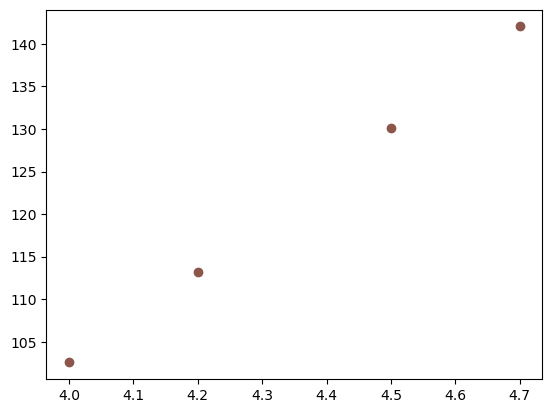

In [36]:
fig,ax=plt.subplots()
line1=ax.plot([x[0] for x in dataSet],[x[1]for x in dataSet],"o",color="tab:brown",label="Data points")
plt.show()

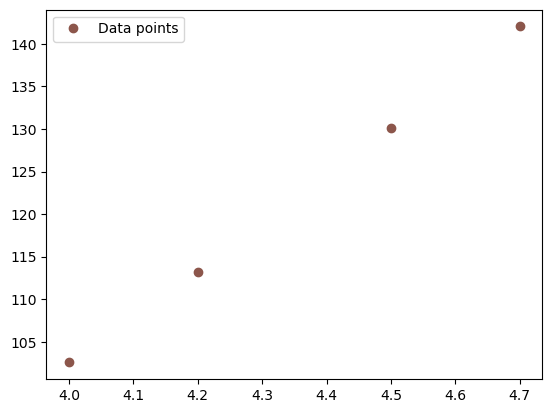

In [35]:
fig,ax=plt.subplots()
line1=ax.plot([x[0] for x in dataSet],[x[1]for x in dataSet],"o",color="tab:brown",label="Data points")
ax.legend()
plt.show()

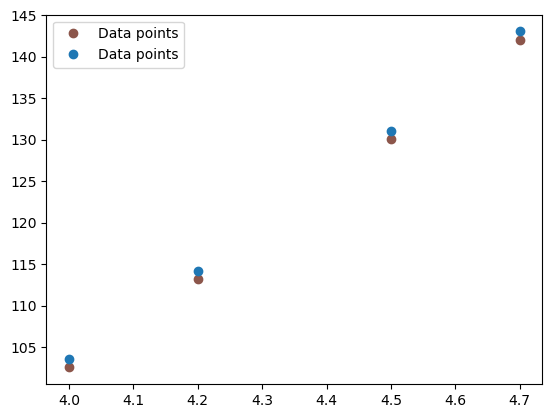

In [37]:
fig,ax=plt.subplots()
line1=ax.plot([x[0] for x in dataSet],[x[1]for x in dataSet],"o",color="tab:brown",label="Data points")
line2=ax.plot([x[0] for x in dataSet],[functionValue(a,x[0])+1 for x in dataSet],"o",color="tab:blue",label="Data points")
ax.legend()
plt.show()

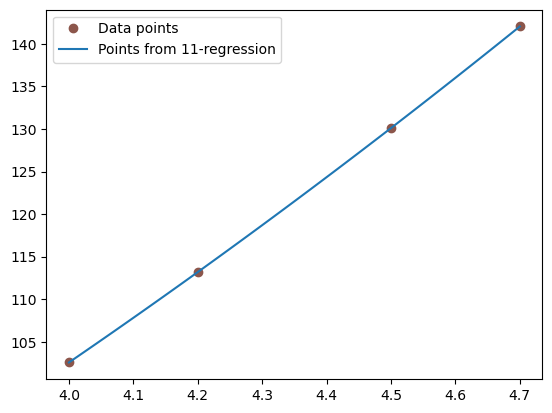

In [47]:
fig,ax=plt.subplots()


samplePoint=np.linspace(dataSet[0][0],dataSet[-1][0],num=100,endpoint=True)
print(samplePoint)
y=[]
for x in samplePoint:
    print(functionValue(a,x))
    y.append(functionValue(a,x)[0])
print(y)


line1=ax.plot([x[0] for x in dataSet],[x[1]for x in dataSet],"o",color="tab:brown",label="Data points")
line2=ax.plot(samplePoint,y,color="tab:blue",label="Points from 11-regression")


ax.legend()
plt.show()

In [52]:
degree=3
tidleA=np.zeros((numberDatapts,degree))
print(tidleA)
for i in range(numberDatapts):
    print(i)
    tidleA[i,0]=1
    for j in range(1,degree):
        tidleA[i,j]=(dataSet[i,0])**j
print(tidleA)


tidleb=np.zeros((numberDatapts,1))
print(tidleb)
for i in range(numberDatapts):
    tidleb[i,0]=dataSet[i,1]
print(tidleb)







tidleA.transpose().dot(tidleA)
tildey=np.linalg.inv(tidleA.transpose().dot(tidleA)).dot(tidleA.transpose().dot(tidleb))
print(tildey)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
0
1
2
3
[[ 1.    4.   16.  ]
 [ 1.    4.2  17.64]
 [ 1.    4.5  20.25]
 [ 1.    4.7  22.09]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[102.56]
 [113.18]
 [130.11]
 [142.05]]
[[ 0.96999999]
 [-1.00275862]
 [ 6.6       ]]


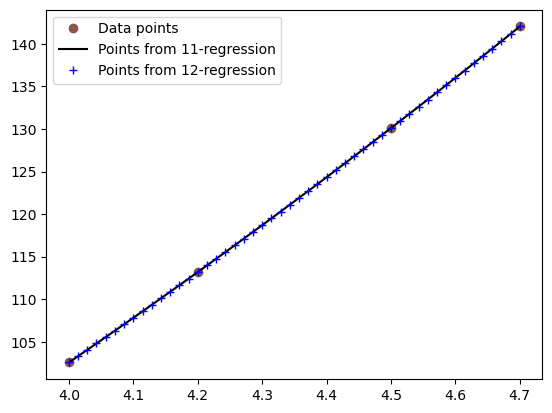

In [63]:
fig,ax=plt.subplots()


samplePoints=np.linspace(dataSet[0][0],dataSet[-1][0],num=50,endpoint=True)

line1=ax.plot([x[0] for x in dataSet],[x[1]for x in dataSet],"o",color="tab:brown",label="Data points")
line2=ax.plot(samplePoints,[functionValue(a,x)[0] for x in samplePoints],color="black",label="Points from 11-regression")
line3=ax.plot(samplePoints,[functionValue(tildey,x)[0] for x in samplePoints],"+",color="blue",label="Points from 12-regression")


ax.legend()
plt.show()

In [43]:
samplePoint=np.linspace(dataSet[0][0],dataSet[-1][0],num=100,endpoint=True)
print(samplePoint)
y=[]
for x in samplePoint:
    print(functionValue(a,x))
    y.append(functionValue(a,x)[0])
print(y)

[4.         4.00707071 4.01414141 4.02121212 4.02828283 4.03535354
 4.04242424 4.04949495 4.05656566 4.06363636 4.07070707 4.07777778
 4.08484848 4.09191919 4.0989899  4.10606061 4.11313131 4.12020202
 4.12727273 4.13434343 4.14141414 4.14848485 4.15555556 4.16262626
 4.16969697 4.17676768 4.18383838 4.19090909 4.1979798  4.20505051
 4.21212121 4.21919192 4.22626263 4.23333333 4.24040404 4.24747475
 4.25454545 4.26161616 4.26868687 4.27575758 4.28282828 4.28989899
 4.2969697  4.3040404  4.31111111 4.31818182 4.32525253 4.33232323
 4.33939394 4.34646465 4.35353535 4.36060606 4.36767677 4.37474747
 4.38181818 4.38888889 4.3959596  4.4030303  4.41010101 4.41717172
 4.42424242 4.43131313 4.43838384 4.44545455 4.45252525 4.45959596
 4.46666667 4.47373737 4.48080808 4.48787879 4.49494949 4.5020202
 4.50909091 4.51616162 4.52323232 4.53030303 4.53737374 4.54444444
 4.55151515 4.55858586 4.56565657 4.57272727 4.57979798 4.58686869
 4.59393939 4.6010101  4.60808081 4.61515152 4.62222222 4.62929

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
0
1
2
3
[[ 1.    4.   16.  ]
 [ 1.    4.2  17.64]
 [ 1.    4.5  20.25]
 [ 1.    4.7  22.09]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[102.56]
 [113.18]
 [130.11]
 [242.05]]
[[ 8925.96999869]
 [-4230.31310285]
 [  506.59999993]]


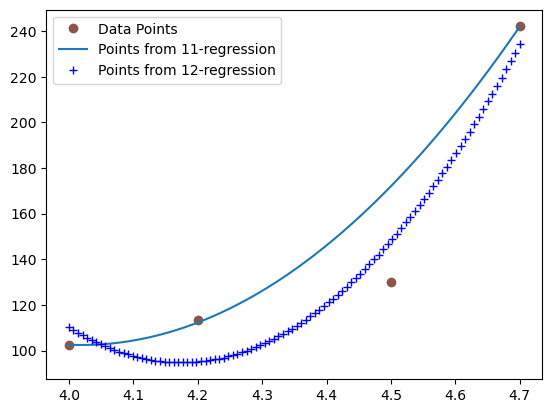

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# d=np.array([[1],[-1],[2],[-2]])
# x=np.array([[1],[1/2],[1/3],[1/4]])
# epsilon=1e-8
# gamma=0.9

def determineStepSizeUB(d,x,gamma,UB=1):
    alphaUB=float("inf")
    n=len(x)
    for i in range(n):
        if d[i,0]<0:
            if alphaUB>-(gamma *x[i,0])/d[i,0]:
                alphaUB=-(gamma *x[i,0])/d[i,0]
    if alphaUB >UB:
        alphaUB=UB
    return alphaUB
def vector2Matrix(barx,n):
    barX=np.zeros((n,n))
    for i in  range(n):
        barX[i,i]=barx[i,0]
    return barX
def functionValue(alpha,t):
    n=len(alpha)
    i,y,tn=0, 0, 1
    for coef in alpha:
        y=y+coef*tn
        tn=tn*t
    return y

dataSet=[[4.0,102.56],[4.2,113.18],[4.5,130.11],[4.7,142.05+100]]
dataSet=np.array(dataSet)
# print(dataSet)
numberDatapts=len(dataSet)
dimDatapt=len(dataSet[0,:])
# print(numberDatapts,dimDatapt)
degree=3
A=np.zeros((numberDatapts,2*degree+2*numberDatapts))
# print(A)
for i in range(numberDatapts):
#     print(i)
    A[i,0*2]=1
    A[i,0*2+1]=-1
    for j in range(1,degree):
        A[i,j*2]=(dataSet[i,0])**j
        A[i,j*2+1]=-(dataSet[i,0])**j
    A[i,5+i*2+1]=1
    A[i,6+i*2+1]=-1
# print(A)
b=np.zeros((numberDatapts,1))
for i in range(numberDatapts):
    b[i,0]=dataSet[i,1]
# print(b)
c=np.zeros((2*degree+2*numberDatapts,1))
for i in range(numberDatapts):
    c[2*degree+i*2,0]=1
    c[2*degree+i*2+1,0]=1
# print(c)
m,n=4,14
# barx=np.zeros((n,1))
barx=np.ones((n,1))
# barx[0,0]=1
# barx[1,0]=1
# barx[2,0]=4
# barx[3,0]=4

#print(r1)
# bary=np.zeros((m,1))
bary=np.ones((m,1))
# bary=np.ones((n,1))
# bary[0,0]=1
# bary[1,0]=1
# bars=np.zeros((n,1))
bars=np.ones((n,1))
# bars[0,0]=1
# bars[1,0]=1
# bars[2,0]=1
# bars[3,0]=1
#print(r2)
e=np.ones((n,1))
mu=100
r1=b-A.dot(barx)
r2=c-A.transpose().dot(bary)-bars
barX=vector2Matrix(barx,n)
barS=vector2Matrix(bars,n)
# barX=np.zeros((n,n))
# barX[0,0]=barx[0,0]
# barX[1,1]=barx[1,0]
# barX[2,2]=barx[2,0]
# barX[3,3]=barx[3,0]
# for i in range(n):
#     barX[i,i]=barx[i,0]
#     #print(barX)
# barS=np.zeros((n,n))
# for i in range(n):
#     barS[i,i]=bars[i,0]
r3=mu*e-barX.dot(barS).dot(e)
r=np.vstack((r1,r2,r3))

iteration=0
while iteration<=100 and np.linalg.norm(r)>1e-6:
#     print(iteration)
    barA=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
    #print(barA)
    barA=np.vstack((barA,np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))))
    #print(barA)
    barA=np.vstack((barA,np.hstack((barS,np.zeros((n,m)),barX))))
    #print(barA)
    DeltaX=np.linalg.inv(barA).dot(r)
    #print(DeltaX)
    Deltax=DeltaX[0:n,:]
    #print(Deltax)
    Deltay=DeltaX[n:n+m,:]
    Deltas=DeltaX[n+m:2*n+m,:]
    #print(Deltay)
    #print(Deltas)
    alphax=0.01

    gamma=0.9
    alphax=determineStepSizeUB(Deltax,barx,gamma)
    #print(alphax)
    alphay=0.01
    alphay=determineStepSizeUB(Deltas,bars,gamma)
    #print(alphay)

    newx=barx+alphax*Deltax
    newy=bary+alphay*Deltay
    news=bars+alphay*Deltas#note alphay
    ###############################################
    barx=newx
    bary=newy
    bars=news
#     print(np.linalg.norm(r))
    mu=barx.transpose().dot(bars)/(10*n)
    
    iteration=iteration+1
    
    r1=b-A.dot(barx)
    r2=c-A.transpose().dot(bary)-bars
    barX=vector2Matrix(barx,n)
    barS=vector2Matrix(bars,n)
    r3=mu*e-barX.dot(barS).dot(e)
    r=np.vstack((r1,r2,r3))
a=np.zeros((degree,1))
a[0,0]=barx[0,0]-barx[1,0]
a[1,0]=barx[2,0]-barx[3,0]
a[2,0]=barx[4,0]-barx[5,0]


tidleA=np.zeros((numberDatapts,degree))
print(tidleA)
for i in range(numberDatapts):
    print(i)
    tidleA[i,0]=1
    for j in range(1,degree):
        tidleA[i,j]=(dataSet[i,0])**j
print(tidleA)


tidleb=np.zeros((numberDatapts,1))
print(tidleb)
for i in range(numberDatapts):
    tidleb[i,0]=dataSet[i,1]
print(tidleb)







tidleA.transpose().dot(tidleA)
tildey=np.linalg.inv(tidleA.transpose().dot(tidleA)).dot(tidleA.transpose().dot(tidleb))
print(tildey)
# print(tildey)

fig, ax = plt.subplots()

samplePoints=np.linspace(dataSet[0][0],dataSet[-1][0],num=100,endpoint=True)


line1 = ax.plot([x[0] for x in dataSet],[x[1] for x in dataSet], "o", color="tab:brown", label="Data Points")
line2 = ax.plot(samplePoints, [functionValue(a,x)[0] for x in samplePoints], label="Points from 11-regression")
line3 = ax.plot(samplePoints, [functionValue(tildey,x)[0] for x in samplePoints],"+", color="blue", label="Points from 12-regression")
                                                
ax. legend()
plt. show()



